In [6]:
#圖資讀取及座標轉換
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib as mpl

import geopandas as gpd
import pandas as pd
import shapely
from descartes import PolygonPatch


In [29]:
town_shp = gpd.read_file('鄉鎮市區界線(TWD97經緯度)1120911/TOWN_MOI_1120825.shp',encoding='utf-8') #呼叫台灣圖資
town_shp

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry
0,V02,10014020,臺東縣,成功鎮,Chenggong Township,V,10014,"POLYGON ((121.40981 23.21370, 121.40984 23.213..."
1,T21,10013210,屏東縣,佳冬鄉,Jiadong Township,T,10013,"POLYGON ((120.54845 22.46067, 120.54853 22.460..."
2,P13,10009130,雲林縣,麥寮鄉,Mailiao Township,P,10009,"POLYGON ((120.30198 23.81624, 120.30198 23.815..."
3,V11,10014110,臺東縣,綠島鄉,Lüdao Township,V,10014,"MULTIPOLYGON (((121.49154 22.67746, 121.49184 ..."
4,V16,10014160,臺東縣,蘭嶼鄉,Lanyu Township,V,10014,"MULTIPOLYGON (((121.61179 21.94290, 121.61133 ..."
...,...,...,...,...,...,...,...,...
363,U12,10015120,花蓮縣,萬榮鄉,Wanrong Township,U,10015,"POLYGON ((121.27481 23.92640, 121.27521 23.926..."
364,H09,68000090,桃園市,龍潭區,Longtan District,H,68000,"POLYGON ((121.19257 24.89410, 121.19262 24.894..."
365,H10,68000100,桃園市,平鎮區,Pingzhen District,H,68000,"POLYGON ((121.19052 24.97122, 121.19059 24.971..."
366,A13,63000090,臺北市,南港區,Nangang District,A,63000,"POLYGON ((121.61426 25.06451, 121.61426 25.064..."


In [30]:
town_shp = town_shp.to_crs(epsg=3826)  # 投影到 twd97
town_shp

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry
0,V02,10014020,臺東縣,成功鎮,Chenggong Township,V,10014,"POLYGON ((291944.638 2568006.258, 291947.405 2..."
1,T21,10013210,屏東縣,佳冬鄉,Jiadong Township,T,10013,"POLYGON ((203528.677 2484633.419, 203536.121 2..."
2,P13,10009130,雲林縣,麥寮鄉,Mailiao Township,P,10009,"POLYGON ((178880.906 2634847.772, 178880.637 2..."
3,V11,10014110,臺東縣,綠島鄉,Lüdao Township,V,10014,"MULTIPOLYGON (((300508.457 2508651.739, 300539..."
4,V16,10014160,臺東縣,蘭嶼鄉,Lanyu Township,V,10014,"MULTIPOLYGON (((313194.739 2427361.112, 313146..."
...,...,...,...,...,...,...,...,...
363,U12,10015120,花蓮縣,萬榮鄉,Wanrong Township,U,10015,"POLYGON ((277975.566 2646899.856, 278016.814 2..."
364,H09,68000090,桃園市,龍潭區,Longtan District,H,68000,"POLYGON ((269454.645 2754061.721, 269459.323 2..."
365,H10,68000100,桃園市,平鎮區,Pingzhen District,H,68000,"POLYGON ((269235.419 2762603.886, 269242.201 2..."
366,A13,63000090,臺北市,南港區,Nangang District,A,63000,"POLYGON ((311971.605 2773063.544, 311971.921 2..."


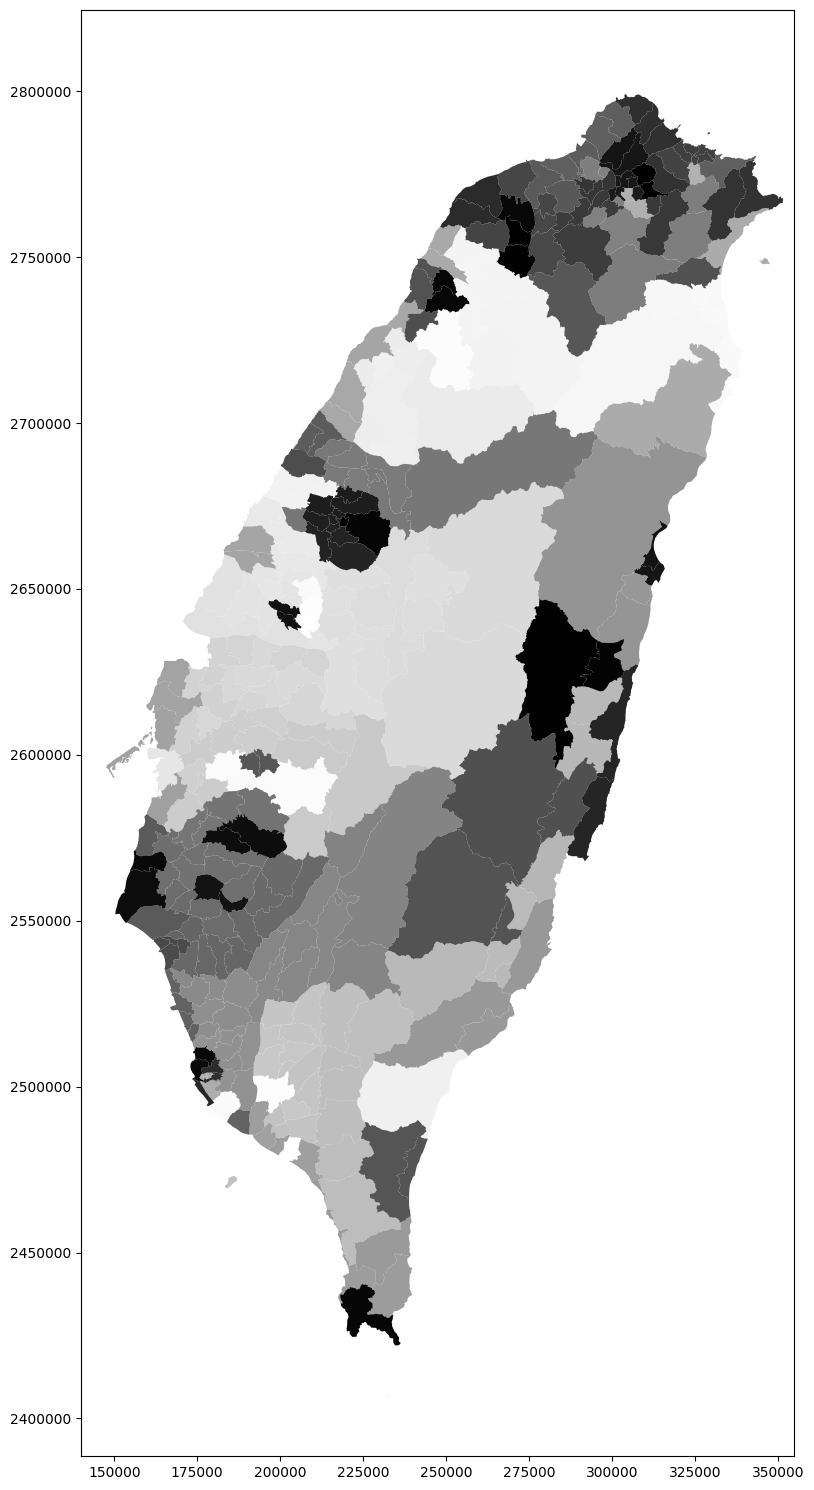

In [35]:
fig, ax = plt.subplots(1,1, figsize=(10,15)) # 定義畫布大小，其中(1,1)代表一行一列，即為一組座標
town_shp.plot(cmap='Greys', ax=ax)
ax.set_xlim([ 140000, 355000]) # 這行設定 X 範圍
ax.set_ylim([ 2388585, 2824514]) # 這行設定 Y 範圍
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.tight_layout() # 加這行去把圖盡可能推展到 10,15 的版面

In [59]:
df = pd.read_csv("參考資料/鄉鎮市區淹水統計資料表_10001~11208.csv", encoding='utf-8-sig')
df = df[['縣市', '鄉鎮', '案件數']]
#df = df[['縣市', '鄉鎮', '案件數']].head(10)
print(df)

      縣市   鄉鎮  案件數
0    臺南市  仁德區  168
1    臺南市  安南區  110
2    臺南市  永康區   93
3    高雄市  前鎮區   74
4    臺北市  士林區   72
..   ...  ...  ...
289  花蓮縣  秀林鄉    1
290  花蓮縣  萬榮鄉    1
291  澎湖縣  湖西鄉    1
292  澎湖縣  西嶼鄉    1
293  澎湖縣  望安鄉    1

[294 rows x 3 columns]


In [60]:
#將上述的資料，放進去地圖資料裡面，成為一個變數
left = town_shp.set_index('TOWNNAME') #這個應該是 geopandas 的 GeoDataFrame 物件
right = df.set_index('鄉鎮') #這應該是 pandas 的 DataFrame 物件

flood_townshp = left.join(right) #用 join把兩個dataframe連起來  
flood_townshp.drop('縣市', axis=1, inplace=True)  #刪除'縣市'欄位
flood_townshp.head()

,TOWNID,TOWNCODE,COUNTYNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry,案件數
TOWNNAME,,,,,,,,
七堵區,C02,10017020,基隆市,Qidu District,C,10017,"POLYGON ((318127.489 2783199.807, 318139.199 2...",22.0
七美鄉,X06,10016060,澎湖縣,Qimei Township,X,10016,"POLYGON ((90355.818 2569652.873, 90371.054 256...",NaN
七股區,D22,67000150,臺南市,Qigu District,D,67000,"POLYGON ((161954.045 2566231.003, 161968.844 2...",5.0
三地門鄉,T26,10013260,屏東縣,Sandimen Township,T,10013,"POLYGON ((226823.190 2526357.341, 226813.544 2...",1.0
三峽區,F15,65000090,新北市,Sanxia District,F,65000,"POLYGON ((291166.133 2760530.192, 291177.098 2...",9.0


In [61]:
flood_townshp['案件數'] = flood_townshp['案件數'].replace(np.nan, 0)#用取代的功能將nan補0
flood_townshp.head()

,TOWNID,TOWNCODE,COUNTYNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry,案件數
TOWNNAME,,,,,,,,
七堵區,C02,10017020,基隆市,Qidu District,C,10017,"POLYGON ((318127.489 2783199.807, 318139.199 2...",22.0
七美鄉,X06,10016060,澎湖縣,Qimei Township,X,10016,"POLYGON ((90355.818 2569652.873, 90371.054 256...",0.0
七股區,D22,67000150,臺南市,Qigu District,D,67000,"POLYGON ((161954.045 2566231.003, 161968.844 2...",5.0
三地門鄉,T26,10013260,屏東縣,Sandimen Township,T,10013,"POLYGON ((226823.190 2526357.341, 226813.544 2...",1.0
三峽區,F15,65000090,新北市,Sanxia District,F,65000,"POLYGON ((291166.133 2760530.192, 291177.098 2...",9.0


C:\Users\T230082\AppData\Local\anaconda3\envs\use\lib\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


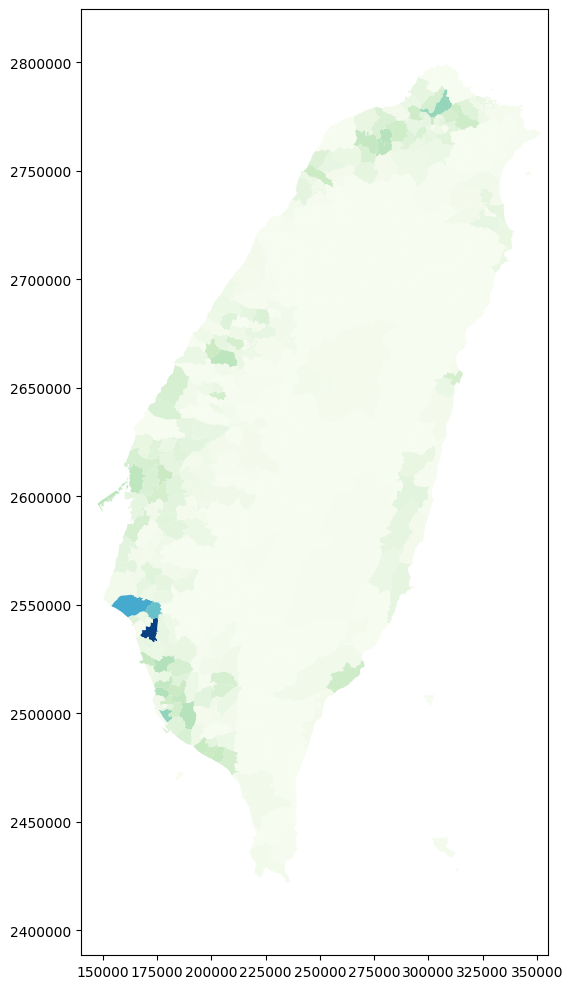

In [69]:
#選擇'N' 這欄位畫出來
fig, ax = plt.subplots(1,1, figsize=(10,10)) # 定義畫布大小，其中(1,1)代表一行一列，即為一組座標
flood_townshp.plot(column='案件數',cmap='GnBu', ax=ax)
ax.set_xlim([ 140000, 355000]) # 這行設定 X 範圍
ax.set_ylim([ 2388585, 2824514]) # 這行設定 Y 範圍
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.tight_layout() # 加這行去把圖盡可能推展到 10,15 的版面

In [66]:
#將 flood_townshp 輸出成為shp file，往後直接呼叫就不用從頭開始做
flood_townshp.to_file("flood_townshp/flood_townshp.shp", encoding='utf-8')

In [68]:
#呼叫另存的淹水圖資
flood_townshp = gpd.read_file('flood_townshp/flood_townshp.shp',encoding='utf-8')

C:\Users\T230082\AppData\Local\anaconda3\envs\use\lib\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


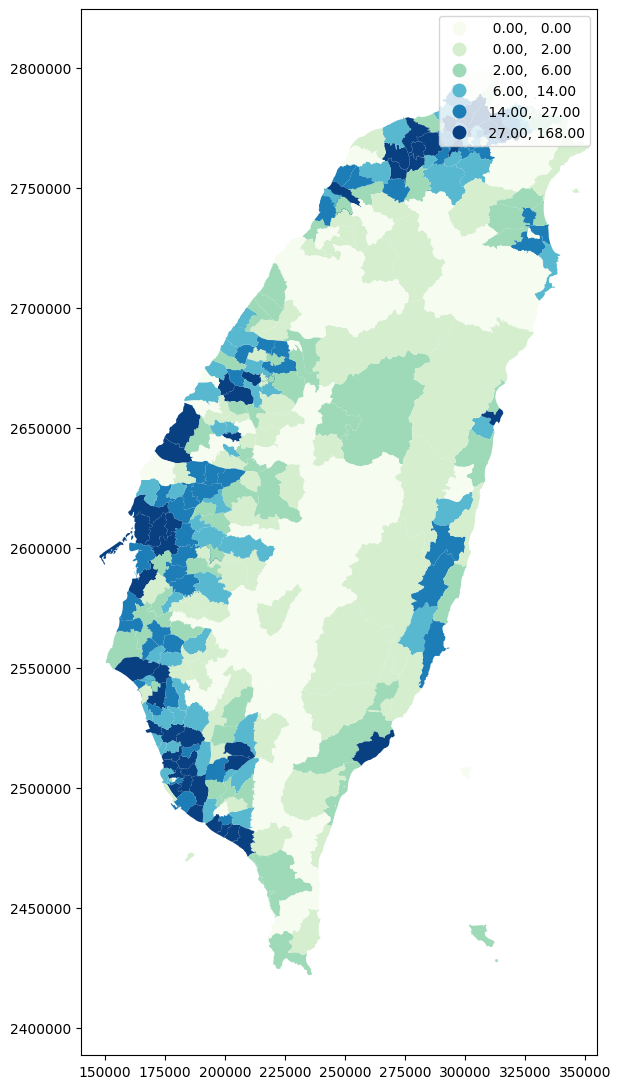

In [86]:
fig, ax = plt.subplots(figsize=(12,11), subplot_kw={'aspect':'equal'})
ax.set_xlim([ 140000, 355000]) # 這行設定 X 範圍
ax.set_ylim([ 2388585, 2824514]) # 這行設定 Y 範圍
flood_townshp.plot(column='案件數', scheme='Quantiles', k=6, cmap='GnBu', legend=True, ax=ax)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.tight_layout() # 加這行去把圖盡可能推展到 10,15 的版面